KDEs help us answer the question: how do we estimate the probability density function (PDF) based on observed data?

This method is non-parametric, meaning we do not make an assumption about the underlying distribution. 
Let's start with histograms and further refine our model.

## Histograms
Histograms are a good starting point for density estimation as they are relatively easy to make. 
To construct a histogram, we divide the observed data interval into adjacent, consecutive groups called 'bins'. 
These are placed on the x-axis and the number of observations that fall into each bin give us the y values.

## KDE
- Is a composite function made up of one kind of building block referred to as a kernel function.
- The kernel function is evaluated for each datapoint separately, and these partial results are summed to form the KDE

### First Principles
Let's start with the simplest example, take one data point x = 0.
A logical PDF for a single data point would be a peak that is precisely over the data point and decays the further away we get. Take $exp(-x^2)$ but... we need to rescale so that the area under our PDF is 1. So we end up with a kernel function that looks something like this. I'm not sure exactly how this was derived (it's a Gaussian distribution with mean 0 and std. deviation of 1) I stole it from [here](https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517/) who I believe stole it from [here](https://www.youtube.com/watch?v=cy8r7WSuT1I).
$$K(x) = \frac{1}{\sqrt{2\pi}} exp(-\frac{x^2}{2})$$

[]

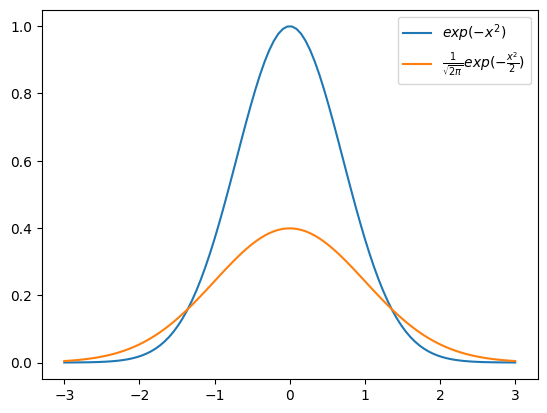

In [3]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-3, 3, 100)

y_1 = np.exp(-1 *(np.square(x))) # exp(-x^2)
y_2 = (1/(np.sqrt(2*np.pi)) * np.exp(-1*(np.square(x)/2))) # exp((1/sqrt(2pi)) * exp(-(x^2/2))


plt.plot(x, np.c_[y_1, y_2], label=[r'$exp(-x^2)$',r'$\frac{1}{\sqrt{2\pi}} exp(-\frac{x^2}{2})$']);
plt.legend()

# Add our kernel functions
plt.plot()

Let's add some extra parameters. Consider a dataset $X$. Let $x_i$ be the $i$ th observation in that dataset. $x_i$ shifts our kernel across the x axis and the kernel bandwidth, $h$ changes the shape of our curve. \
*Note:* we divide our kernel function by $h$ to restore our PDF back to unit area. Now, we can estimate the PDF of any point $x_i$ using.
$$\frac{1}{h}K(\frac{x-x_i}{h})$$

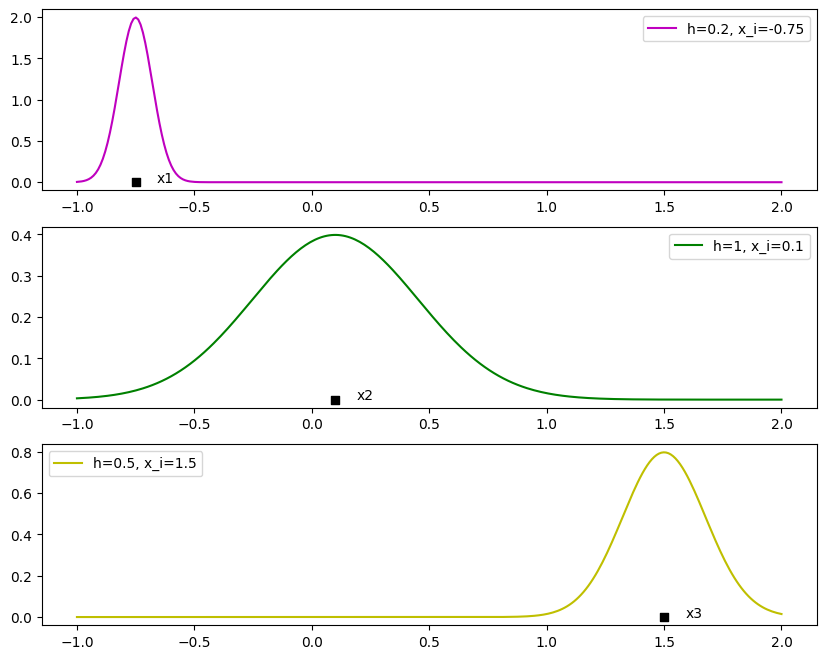

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 1, figsize=(10,8))

x_points = [-0.75, 0.1, 1.5]
y_points = [0, 0, 0]
h = [0.2, 1, 0.5]
point_labels = ["x" + str(i+1) for i in range(len(x_points))]
colours = ["m", "g", "y"]

for i in range(3):
    # Plot our data points
    axs[i].scatter(x_points[i], y_points[i], color="black", marker="s")
    axs[i].text(x_points[i]+0.09, y_points[i], point_labels[i])

    # Plot our PDF
    x = np.linspace(-1, 2, 300)
    y = (1/h[i]) * (1/(np.sqrt(2*np.pi))) * np.exp(-1*(np.square(((x-x_points[i])/h[i]*2))))
    axs[i].plot(x, y, linestyle="-", label=f"h={h[i]}, x_i={x_points[i]}", color=colours[i])
    axs[i].legend()

How do we estimate the PDF across our entire dataset, $X$? Let's extend our previous function to generalise to $n$ data points 

TODO: the rest is a work in progress.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

x_points = [0, 1.5, -1]
y_points = [0, 0, 0]
point_labels = ["x" + str(i+1) for i in range(len(x_points))]


# Add points and labels
plt.scatter(x_points, y_points, color="black", marker="s")
for i in range(len(x_points)):
    plt.text(x_points[i]+0.09, y_points[i], point_labels[i])

# Add our kernel functions
plt.plot()


$K(x) = 1/sqrt(2pi) exp[-(x^2)/2]$

This is our Kernel function and is a valid PDF. Effectively a Gaussian distribution with mean 0 and unit variance

This is our Gaussian kernel.
If we expand it to N datapoints and scale back our PDF, we get a smoother fit of our PDF.


TODO:
- Show a script deriving from first principles using a Guassian Kernel function (like in the towardsdatascience paper)
- Use seaborn as a more polished/modern/faster way of doing it.
- Look into scikit learn and the KernelDensity function that is has. (you can choose different kernels)

## Useful Reading
https://www.mvstat.net/tduong/research/seminrs/seminar-2001-05/
https://towardsdatascience.com/kerneldensit-estimation-explained-step-by-step-7cc5b5bc4517/
https://chriskhanhtran.github.io/_poss/202001-13-portfolio-tutorial/
https://quarto.org/